In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.3548 - val_loss: 0.2637
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2585 - val_loss: 0.2532
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2461 - val_loss: 0.2384
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2303 - val_loss: 0.2202
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2104 - val_loss: 0.2012
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.1940 - val_loss: 0.1884
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.1850 - val_loss: 0.1795
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.1776 - val_loss: 0.1727
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.1724 - val_loss: 0.1677
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.1672 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1026 - val_loss: 0.1024
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1024 - val_loss: 0.1010
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1022 - val_loss: 0.1000
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1019 - val_loss: 0.1014
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1017 - val_loss: 0.0999
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1015 - val_loss: 0.1008
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1014 - val_loss: 0.1010
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1012 - val_loss: 0.1007
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1009 - val_loss: 0.1004
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1009 - val_loss: 0.1001
Epoch 95/100
60000/60000 [=================

In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [7]:
decoded_imgs = autoencoder.predict(x_test)

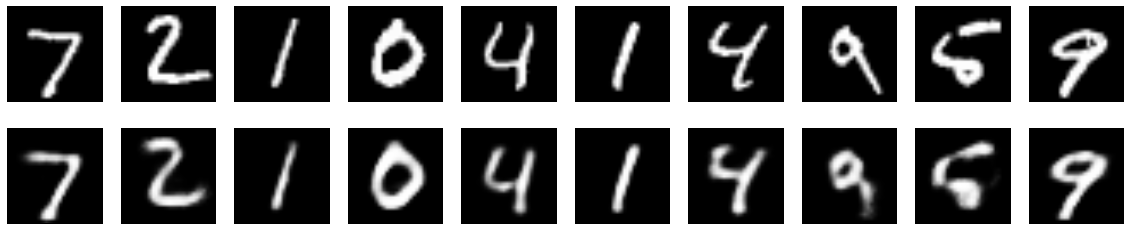

In [8]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()